In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import matfile
import scipy.io as sio
import hdf5storage

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [43]:
dat = matfile.loadmatbunch('../topo/Grid.mat')
# this is organized in an odd way
grid = dat['Grid']
lines=[]
for gg in grid:
    line = dict()
    line['name'] = gg[0][0]
    line['lonb']=gg[1][0][1]
    line['latb']=gg[1][0][0]
    line['lonf']=gg[2][0][1]
    line['latf']=gg[2][0][0]
    lat = np.array([]); lon = np.array([])
    dep = np.array([])
    
    for i in range(len(gg[3])):
        #print gg[i][0][0]
        lat = np.append(lat,gg[3][i][0])
        lon = np.append(lon,gg[3][i][1])
        #dep = np.append(dep,gg[-1][i])
    #line['depths']=dep
    
    line['lat']=lat
    line['lon']=lon
    lines.append(line)
import cPickle as pickle
pickle.dump(lines,open('DCLines.pickle','wb'))
#hdf5storage.savemat('DCLines.mat',lines)


<IPython.core.display.Javascript object>


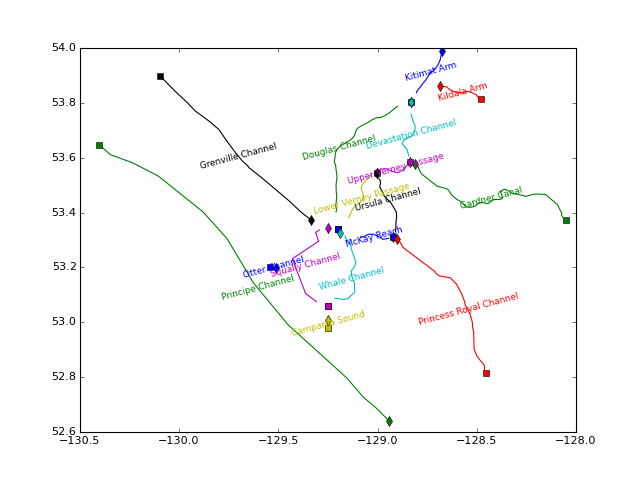

0.874364572115
0.897003501222
2.91684211458
1.53875601325
0.22810262828
0.81282270739
1.91650194488
-0.106735672649
2.87620615529
2.31341850547
1.33843783144
1.56228891063
1.66111764005
-0.604174996149
-0.00561043280917
-0.603512960068


In [44]:
fig,ax=plt.subplots()
for line in lines:
    l, =ax.plot(line['lon'],line['lat'],'-')    
    
    ax.plot(line['lonb'],line['latb'],'d',color=l.get_color())
    ax.plot(line['lonf'],line['latf'],'s',color=l.get_color())
    a = np.arctan2(line['latb']-line['latf'],line['lonb']-line['lonf'])
    print a
    ax.text(np.median(line['lon']),np.median(line['lat']),line['name'],fontsize=8,
            ha='center',va='center',rotation=15,color=l.get_color())

In [45]:
for nn,line in enumerate(lines):
    print('%02d %s'%(nn, line['name']))

00 Kitimat Arm
01 Douglas Channel
02 Kildala Arm
03 Devastation Channel
04 Upper Verney Passage
05 Lower Verney Passage
06 Ursula Channel
07 McKay Reach
08 Gardner Canal
09 Princess Royal Channel
10 Whale Channel
11 Squally Channel
12 Campania Sound
13 Grenville Channel
14 Otter Channel
15 Principe Channel
